# **CALIFORNIA HOUSE PRICE PREDICTION**

![house_img.png](house_img.png)

## **Features Information:**<br>
**Continuous Attributes - 9**<br>

**Multiclass Attribute - 1**

- longitude: The longitude of the house's location. It indicates the geographic location of the house in terms of east or west position relative to the Prime Meridian.

- latitude: The latitude of the house's location. It represents the north or south position relative to the Equator.

- housing_median_age: The median age of the houses in the block. This attribute gives an idea of how old the houses are on average in that area.

- total_rooms: The total number of rooms in the house. This includes all rooms such as bedrooms, bathrooms, living rooms, etc.

- total_bedrooms: The total number of bedrooms in the house. This attribute provides information on how many bedrooms are in the house.

- population: The total number of people residing in the block. This is a measure of the population density of the area.

- households: The number of households in the block. A household typically refers to a group of people living together in a single dwelling.

- median_income: The median income of households in the block, - expressed in tens of thousands of dollars. This is a key economic indicator for the area.

- median_house_value: The median house value in the block, expressed in dollars. This is the target variable for predicting house prices in many machine learning models.

- ocean_proximity: This categorical attribute indicates the proximity of the house to the ocean. Possible values include categories like "NEAR BAY," "NEAR OCEAN," "ISLAND," "INLAND," and "OUTLYING."

>### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

># **DATASET OVERVIEW**

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


`"total_bedrooms" feature got missing values`

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> ### DISTRIBUTIONS OF THE FEATURES

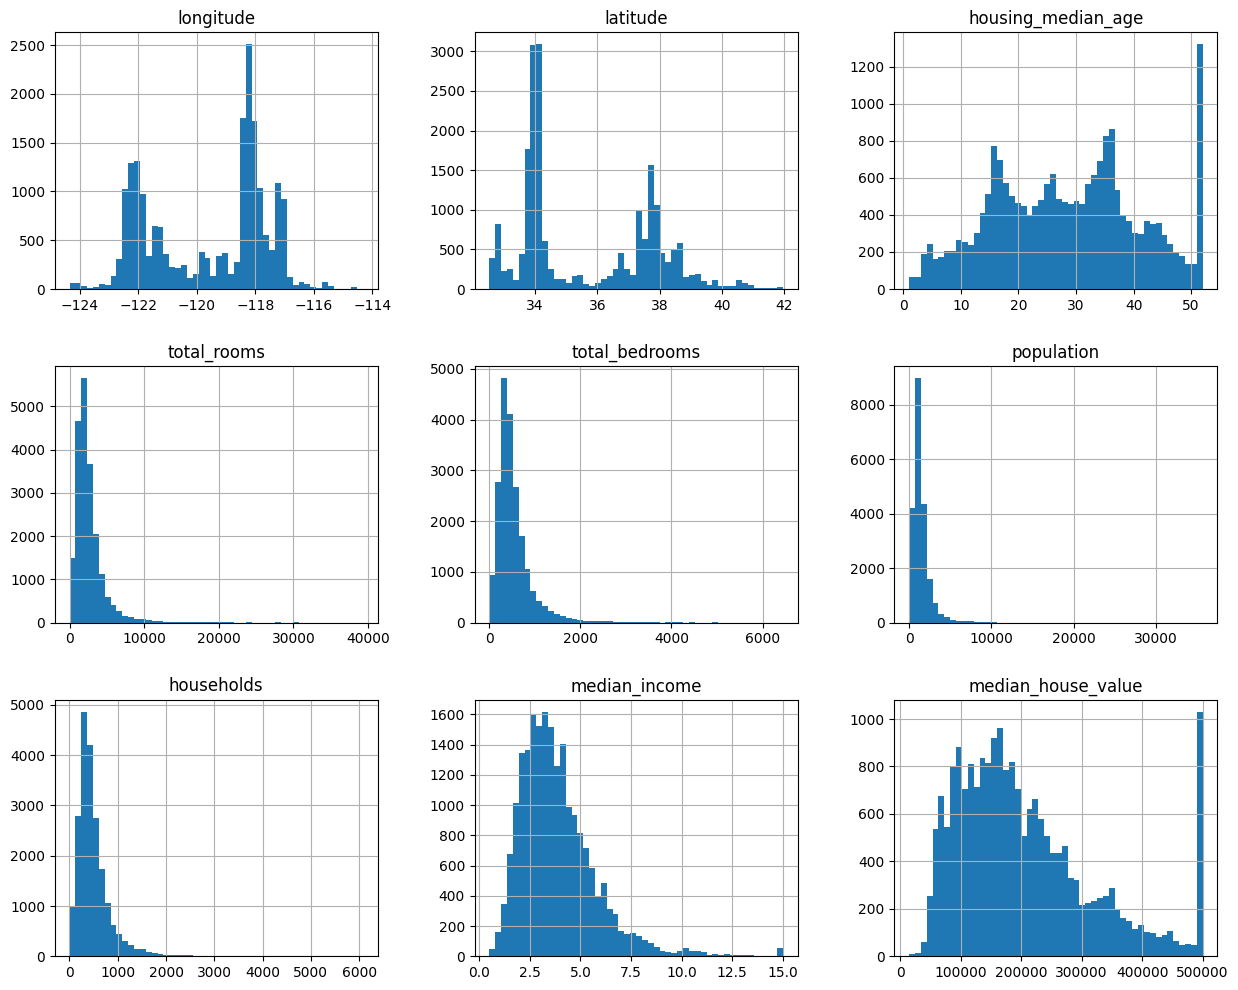

In [5]:
housing.hist(bins=50, figsize=(15, 12))
plt.show()

`Some of the distributions are right skewed, This makes harder for ML Algorithms to detect patterns.`

<hr>

> # **DATA VISUALIZATION**

In [6]:
# Creating a copy of dataset for performing some operations which required just for visulization  
temp_housing1 = housing.copy()

> ### Encoding "Ocean_proximity" feature

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
temp_housing1['ocena_num'] = encoder.fit_transform(temp_housing1['ocean_proximity'])
temp_housing1 = temp_housing1.drop("ocean_proximity", axis=1) 
temp_housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocena_num
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [8]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

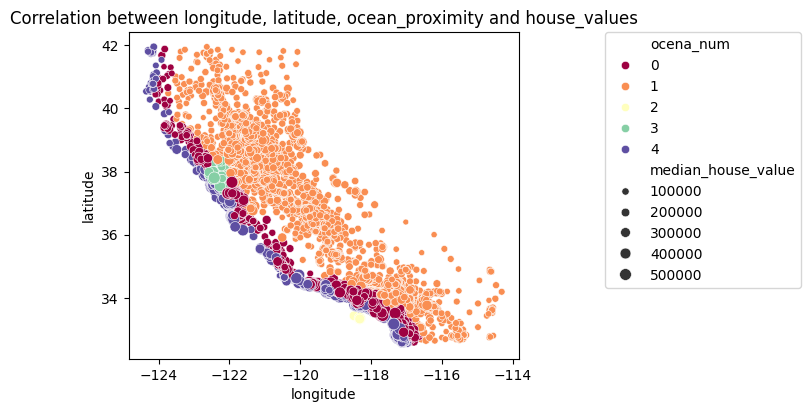

In [9]:
import seaborn as sns

scatter_plot = plt.figure(figsize=(8, 4))
sns.scatterplot(
    x = temp_housing1['longitude'],
    y = temp_housing1['latitude'],
    size = temp_housing1['median_house_value'],
    hue = temp_housing1['ocena_num'],
    palette = "Spectral"
)
plt.legend(bbox_to_anchor=(1.22, 1),
           borderaxespad=0)
plt.tight_layout()

plt.title("Correlation between longitude, latitude, ocean_proximity and house_values")

plt.show()

> Housing values are `higher in the Bay Area` and  the `area near the ocean`, and they `decrease as you move towards land region`

> `Longitude and Latitude` are seems to be `negatively correlated` with `Housing Values`

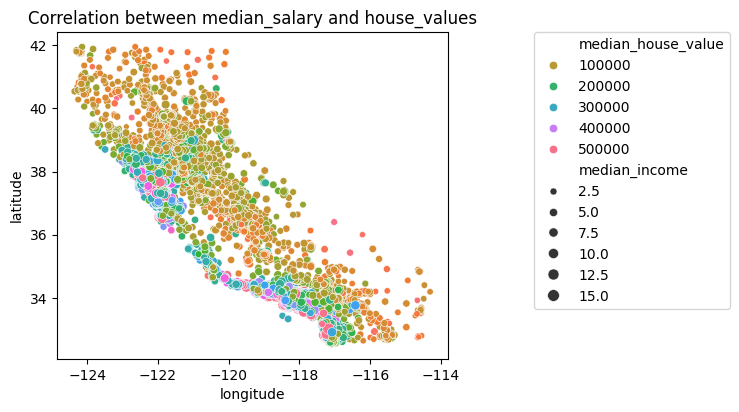

In [10]:
scatter_plot = plt.figure(figsize=(8, 4))
sns.scatterplot(
    x = temp_housing1['longitude'],
    y = temp_housing1['latitude'],
    size = temp_housing1['median_income'],
    hue = temp_housing1['median_house_value'],
    palette = "husl"
)
plt.legend(bbox_to_anchor=(1.22, 1),
           borderaxespad=0)
plt.tight_layout()

plt.title("Correlation between median_salary and house_values")

plt.show()

> `Median Salary` is `strongly correlated` with Housing Values

> ### LOOKING FOR CORRELATIONS

In [11]:
corr_matrix = housing.corr(numeric_only=True)

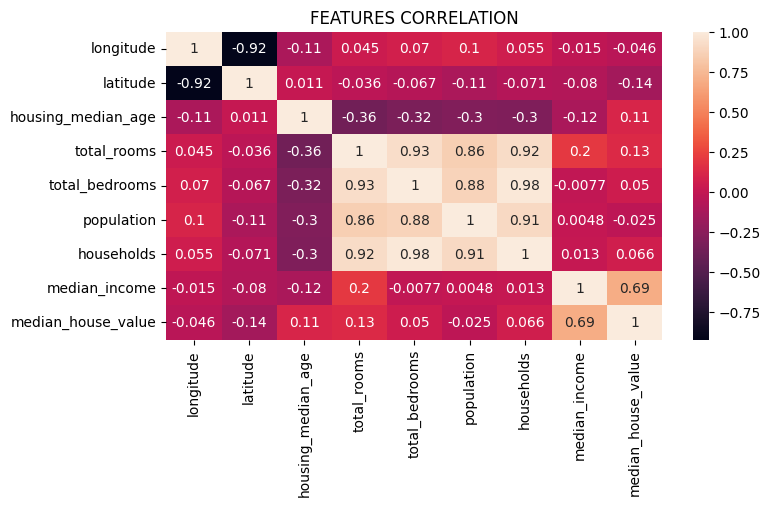

In [12]:
plt.figure(figsize=(8, 4))
sns.heatmap(data=corr_matrix, annot=True, cbar=True)
plt.title("FEATURES CORRELATION")
plt.show()

<Figure size 800x400 with 0 Axes>

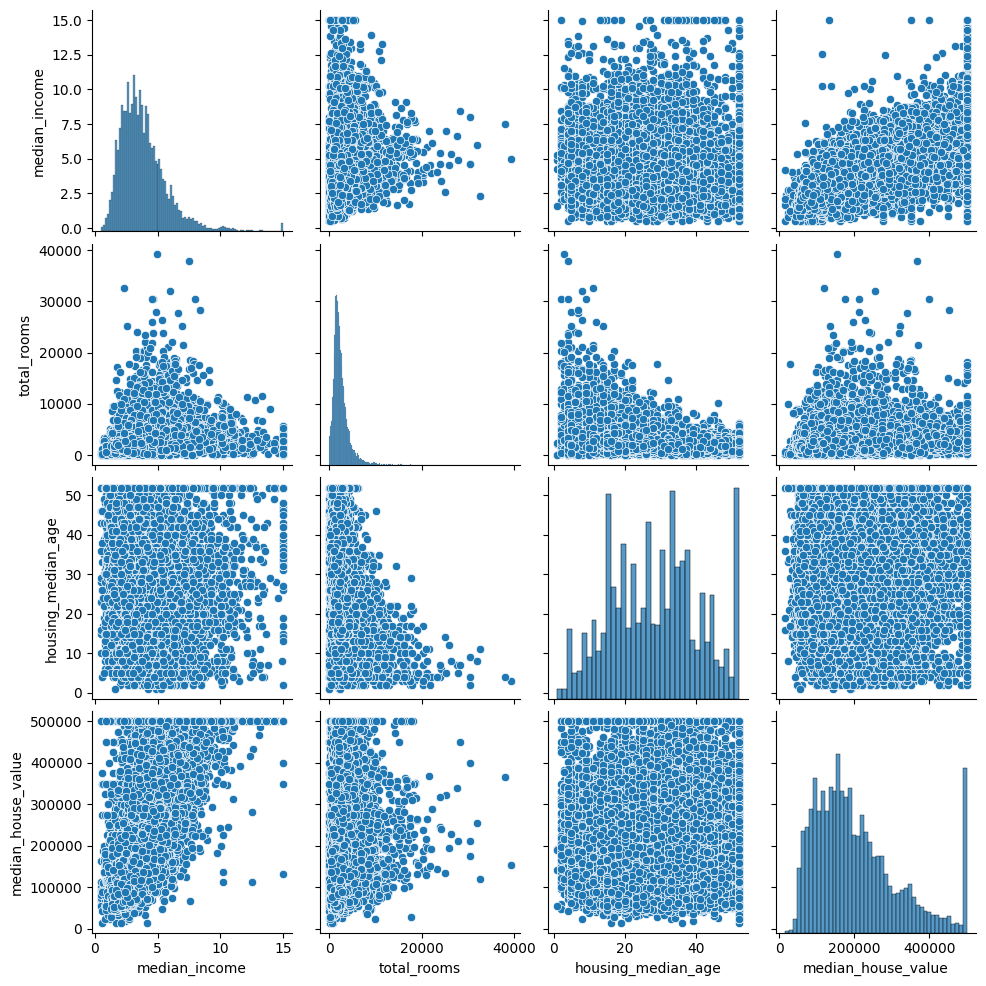

In [13]:
plt.figure(figsize=(8,4))
sns.pairplot(temp_housing1.loc[:, ['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']], dropna=True)
plt.show()

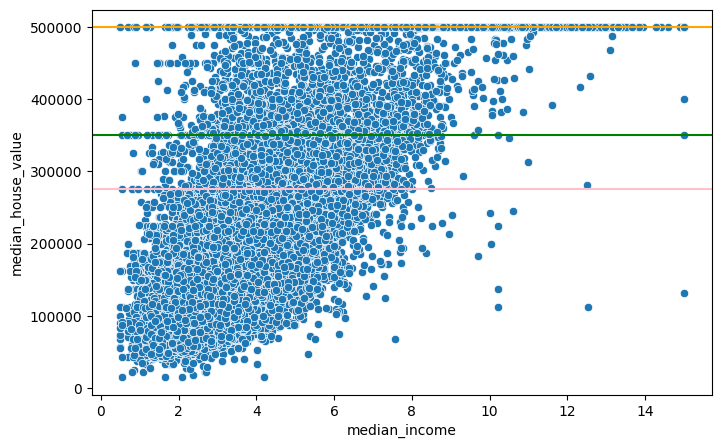

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x = temp_housing1['median_income'], y = temp_housing1['median_house_value'])
plt.axhline(y = 500000, color = 'orange')
plt.axhline(y = 350000, color = 'green')
plt.axhline(y = 275000, color = 'pink')

plt.show()

> # **DATA PREPROCESSING**

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them.

In [15]:
temp_housing2 = housing.copy()

temp_housing2['total_bedrooms'].isna().values.sum()

np.int64(207)

> ### HANDLING MISSING VALUES

>There are three ways of handling missing values<br>
>- Get rid of the corresponding districts - (rows).<br><br>
>- Get rid of the whole attribute.<br><br>
>- Set the values to some value (zero, the mean, the median, etc.).

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 20)
imputer.fit_transform(temp_housing1)[:, 4:5]
temp_housing1['total_bedrooms'] = imputer.fit_transform(temp_housing1)[:, 4:5]

In [17]:
temp_housing1['total_bedrooms'].isna().values.sum()

np.int64(0)

> ### OUTLIER DETECTION

1. Statistical Methods

    - Z-Score Method:

    - Modified Z-Score:

2. Visualization Methods

    - Box Plot:

    - Scatter Plot:

3. Machine Learning Methods

    - Isolation Forest:

    - Local Outlier Factor (LOF):

> # **FEATURE ENGINEERING**

> Performing Attribute Combinations

In [18]:
temp_housing3 = temp_housing2.copy()

In [19]:
temp_housing3["rooms_per_house"] = temp_housing3["total_rooms"] / temp_housing3["households"]
temp_housing3["people_per_house"] = temp_housing3["population"] / temp_housing3["households"]
temp_housing3["bedrooms_ratio"] = temp_housing3["total_bedrooms"] / temp_housing3["total_rooms"]

In [20]:
corr_matrix = temp_housing3.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

> The new bedrooms_per_room attribute is much more correlated with
 the median house value than the total number of rooms or bedrooms.

> The houses with a lower bedroom/room ratio tend to be more expensive.

>The number of
 rooms per household is also more informative than the total number of rooms in a
 district—obviously the larger the houses, the more expensive they are.

<hr>

> # **FEATURE TRANSFORMATION**

- Techniques - 

    - Ordinal Encoding : When the categories have orders/weightage

    - Label Encoding : Same as Ordinal Encoding

    - One Hot Encoding : For Nominal Categories

> ### HANDLING CATEGORICAL AND TEXT ATTRIBUTES

In [21]:
temp_housing4 = temp_housing3.copy()

In [22]:
temp_housing4['ocean_proximity'].values.reshape(-1, 1)

<StringArray>
[
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NEAR BAY'],
['NE

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(temp_housing4['ocean_proximity'].values.reshape(-1, 1))

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

In [24]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
decoded = pd.DataFrame(
    ohe.transform(temp_housing4['ocean_proximity'].values.reshape(-1, 1)).toarray(),
    columns=['<1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']   
)
decoded.head()

,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [26]:
temp_housing4 = pd.concat([temp_housing4, decoded], axis=1)

In [27]:
temp_housing4.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,people_per_house,bedrooms_ratio,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
14091,-117.81,33.73,19.0,4022.0,975.0,2334.0,954.0,3.0305,140600.0,<1H OCEAN,4.215933,2.446541,0.242417,1.0,0.0,0.0,0.0,0.0
16790,-117.79,34.07,33.0,1694.0,333.0,1689.0,301.0,3.7583,116300.0,INLAND,5.627907,5.611296,0.196576,0.0,1.0,0.0,0.0,0.0
6287,-117.10,34.57,6.0,5110.0,1044.0,1938.0,724.0,3.1917,112800.0,INLAND,7.058011,2.676796,0.204305,0.0,1.0,0.0,0.0,0.0
16572,-117.97,33.68,23.0,1722.0,316.0,865.0,309.0,4.6452,273800.0,<1H OCEAN,5.572816,2.799353,0.183508,1.0,0.0,0.0,0.0,0.0
6524,-120.80,38.31,37.0,1341.0,256.0,533.0,242.0,3.2135,123600.0,INLAND,5.541322,2.202479,0.190902,0.0,1.0,0.0,0.0,0.0


> ### FEATURE TRANSFORMATION

In [28]:
# 'ocean_proximity' is already encoded so removing it
temp_housing5 = temp_housing4.drop('ocean_proximity', axis=1)
temp_housing5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,people_per_house,bedrooms_ratio,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0.155797,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0.129516,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0.184458,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0.172096,0.0,0.0,0.0,1.0,0.0


> `StandardScaler` - Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the variance so that the result‐
ing distribution has unit variance. Unlike min-max scaling, standardization does not
bound values to a specific range, which may be a problem for some algorithms (e.g.,
neural networks often expect an input value ranging from 0 to 1). However, standard‐
ization is much less affected by outliers. For example, suppose a district had a median
income equal to 100 (by mistake). Min-max scaling would then crush all the other
values from 0–15 down to 0–0.15, whereas standardization would not be much affec‐
ted. Scikit-Learn provides a transformer called StandardScaler for standardization.

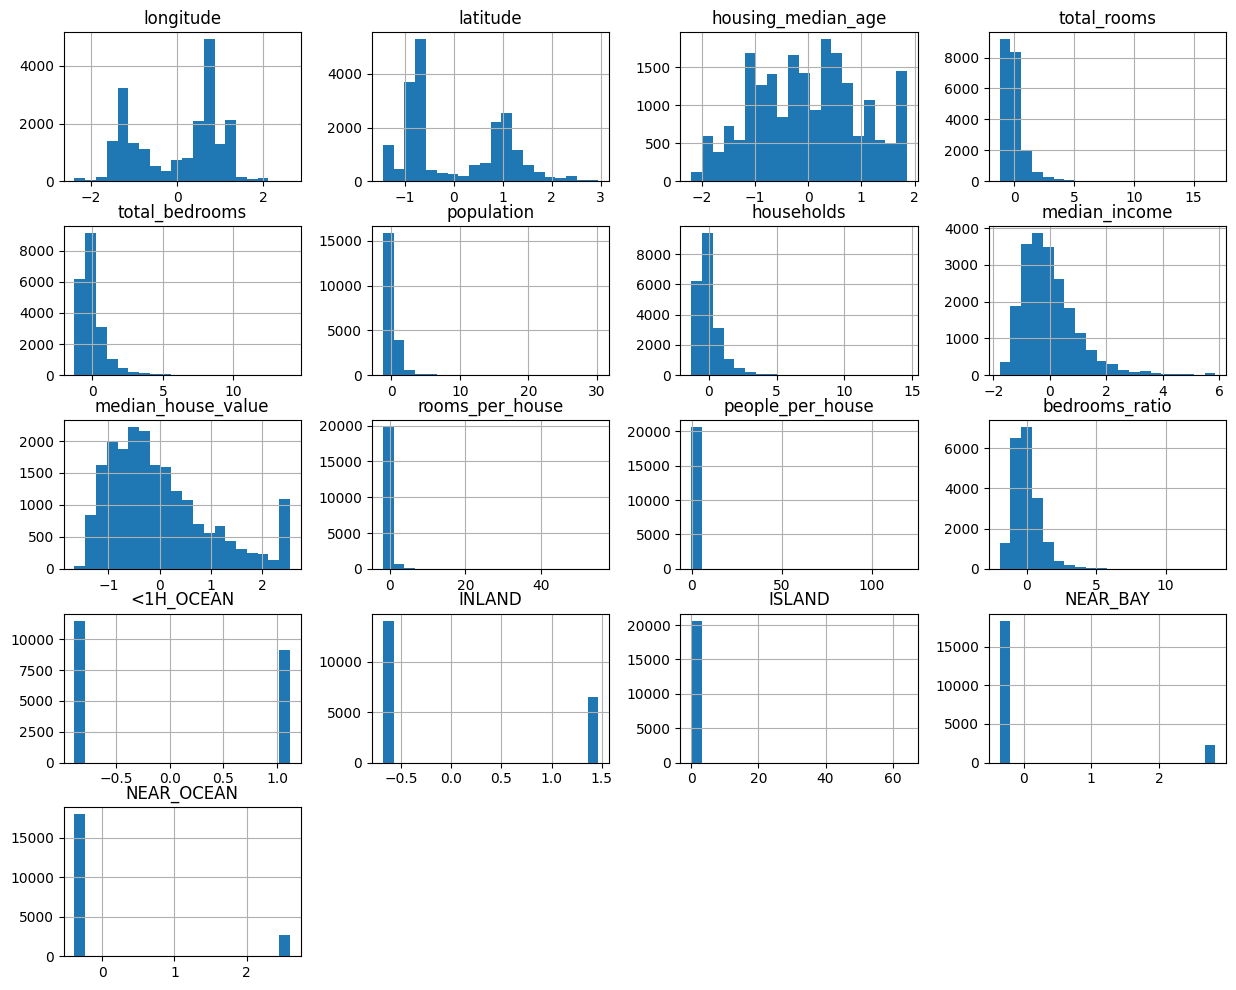

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_std = StandardScaler()
scaled_housing = pd.DataFrame(scaler_std.fit_transform(temp_housing5),columns=scaler_std.feature_names_in_)

scaled_housing.hist(bins=20, figsize=(15,12))
plt.show()

> `MinMaxScaler` - Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min. Scikit-Learn provides a
transformer called MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.

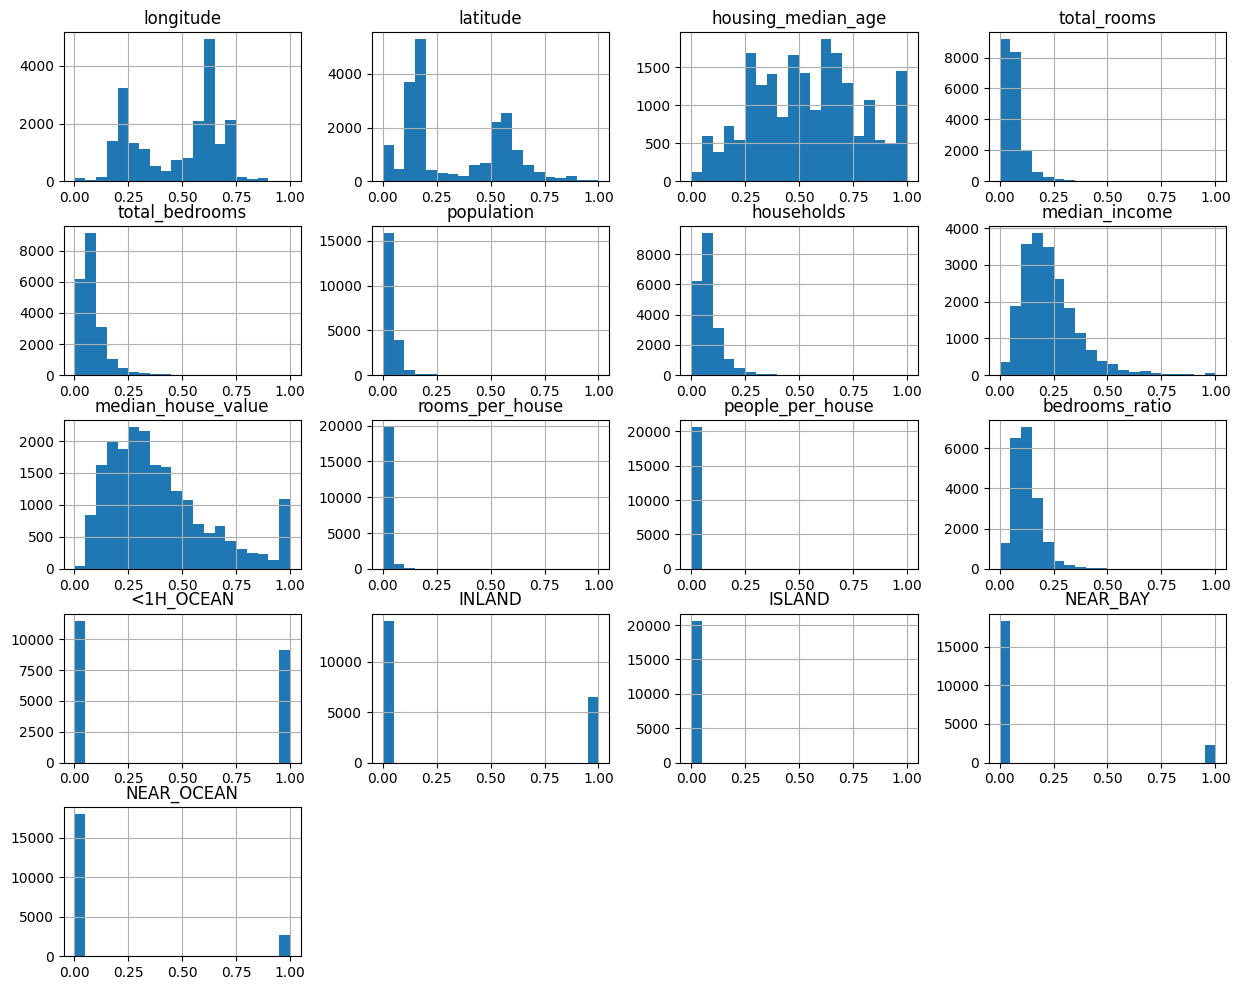

In [30]:
scaler_minmax = MinMaxScaler()
scaled_housing = pd.DataFrame(scaler_minmax.fit_transform(temp_housing5),columns=scaler_std.feature_names_in_)

scaled_housing.hist(bins=20, figsize=(15, 12))
plt.show()

> `log-transformation` - This transform is useful when there is a heavy tailed distribution (skewed)

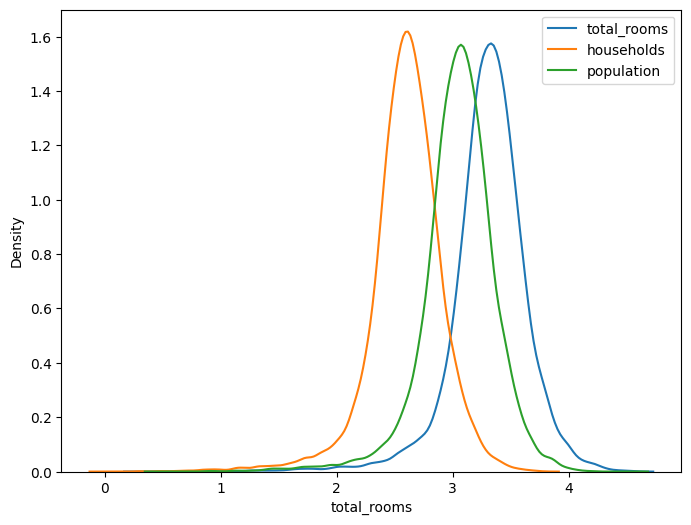

In [31]:
plt.figure(figsize=(8,6))
sns.kdeplot(temp_housing5['total_rooms'].apply(np.log10), label = 'total_rooms')
sns.kdeplot(temp_housing5['households'].apply(np.log10), label = 'households')
sns.kdeplot(temp_housing5['population'].apply(np.log10), label = 'population')

plt.legend()
plt.show()

> `Bucketezing` - This transform is useful when there is a heavy tailed distribution (skewed)

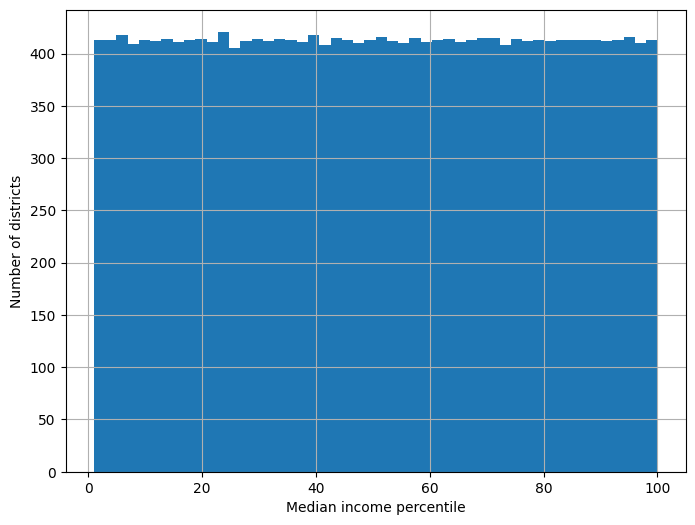

In [32]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
plt.figure(figsize=(8, 6))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

> When a feature has a `MultiModal Distribution` it can also be `bucketizing` it, but treating buckets ID's as category rather than numerical values and transform them using `OneHotEncoding` - These transformation will perform good on `Regression` Models. 

In [33]:
bins = [ -np.inf, 11.2, 21.4, 31.6, 41.8, np.inf] # 1823, 4916, 4864, 5455, 3582
encoded = np.digitize(temp_housing5['housing_median_age'], bins=bins).reshape(-1, 1)

In [34]:
ohe = OneHotEncoder()
decoded = pd.DataFrame(ohe.fit_transform(encoded).toarray().astype(np.int64), 
            columns=[f"bin_{i}" for i in range(1, 6)]) / 5

temp_housing5 = pd.concat([temp_housing5, decoded], axis = 1)
temp_housing5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,...,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,bin_1,bin_2,bin_3,bin_4,bin_5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,...,0.0,0.0,0.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2


In [35]:
X = temp_housing5.drop('median_house_value', axis=1)
y = temp_housing5.loc[:, 'median_house_value']

In [36]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(value=X['total_bedrooms'].mean())
X['bedrooms_ratio'] = X['bedrooms_ratio'].fillna(value=X['bedrooms_ratio'].mean())

> `LinearRegression` - just for checking the performance of this transformation

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2_score(y, y_pred)

0.6553534510494256

> ### FEATURE TRANSFORMATION USING `CUSTOM TRANSFORMERS`

In [38]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
log_population = log_transformer.transform(temp_housing5['population'])

log_population.to_frame().head()

,population
0,5.774552
1,7.783641
2,6.206576
3,6.324359
4,6.336826


> `Custom Transformers` are also useful to combine features.

In [39]:
ratio_transformer = FunctionTransformer(lambda col: col[:, 0] / col[:, 1])
rooms_per_house = ratio_transformer.transform(np.array(temp_housing5.loc[:, ['total_rooms', 'households']]))
rooms_per_house

array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698], shape=(20640,))

> `Custom Transformers` are also useful to Data Cleaning.

In [40]:
def replace_nan_with_mean(X):
    mean_value = np.nanmean(X)  # Compute mean while ignoring NaNs
    return np.where(np.isnan(X), mean_value, X)

ratio_transformer = FunctionTransformer(func=replace_nan_with_mean) # You cannot write inline function for this.
ratio_transformer.transform(np.array(housing['total_bedrooms']).ravel())

array([ 129., 1106.,  190., ...,  485.,  409.,  616.], shape=(20640,))

> ### CUSTOM TRANSFORMER CLASS - `StandardScaler`

Creating our own StandardScaler transformer who contains `fit` and `transform` method

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [42]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init(self, with_mean = True): # no *args and **kwargs
        self.with_mean = with_mean
    
    def fit(self, X, y = None):
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # Stores the number of features
        # self.features_names_in_ = X.columns # Stores the names of the features - For DataFrame
        return self

    def transform(self, X):
        check_is_fitted(self) # Fetch the learned attributes
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1] # and self.features_names_in_ == X.columns
        X = X - self.mean_
        return X / self.std_

In [43]:
std_transformer = StandardScalerClone()
std_transformer.fit(np.array(temp_housing5.loc[:, ['median_income']]))
std_transformer.transform(np.array(temp_housing5.loc[:, ['median_income']]))

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]], shape=(20640, 1))

<hr>

> # **MACHINE LEARNING PIPELINES**

> - The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like.

> - When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.

> - The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler, which is a transformer, so the pipeline has a trans
form() method that applies all the transforms to the data in sequence (it also has a
fit_transform method that we could have used instead of calling fit() and then
transform()).

In [44]:
temp_housing6 = housing.copy()
temp_housing6.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

> Pipeline for `Numerical Features`

In [46]:
num_feature_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy='median')), # Handling missing values
    ('standardscaler', StandardScaler()) # Feature Scaling
])

new_temp6 = num_feature_pipeline.fit_transform(temp_housing6.drop('ocean_proximity', axis=1))

pd.DataFrame(new_temp6, columns=num_feature_pipeline.get_feature_names_out()).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


> Pipeline for `Categorical Features`

In [47]:
cat_feature_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy='most_frequent')), # Handling missing values
    ('ohe', OneHotEncoder()) # Feature Scaling
])

new_temp6 = cat_feature_pipeline.fit_transform(temp_housing6['ocean_proximity'].to_frame()).toarray()

pd.DataFrame(new_temp6, columns=['<1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']).astype(np.int32).head()

,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


> ### ColumnTransformer

> A single transformer who capable of doing both numerical and caterogical transformations
Basically, we are creating a pipeline of pipelines.

In [48]:
from sklearn.compose import ColumnTransformer, make_column_selector # Used to select columns based of there datatype

preprocessing = ColumnTransformer([
    ('num', num_feature_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_feature_pipeline, make_column_selector(dtype_include=np.object_))
])

pd.DataFrame(preprocessing.fit_transform(temp_housing6), columns=preprocessing.get_feature_names_out()).head()
# Here we dont require toarray() reason ⬇️

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,num__median_house_value,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0


> The `OneHotEncoder` returns a `Sparse Metrix` and `num_feature_pipeline` returns a `Dense Metrix` : When there is such a mix of sparce and dense metrices, the `ColumnTransformer` estimates the `Density of final metrix (i.e. The number of non zero cells)` and it returns a `sparce matrix` if `density is lower than given given threshold` by `default sparce_threshold = 0.3`, Otherwise `dense matrix.`

> ### COMBINING ALL THE TRANSFORMATION DONE SO FAR

In [49]:
def column_ratio(X):
    return X[:, [0]]/X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

In [50]:
# Pipelines for numerical columns
def ratio_pipeline():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('ratio_calculater', FunctionTransformer(func=column_ratio, validate=False, feature_names_out=ratio_name)),
        ('standardscaler', StandardScaler())
    ])

def log_pipeine():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('log_calculater', FunctionTransformer(np.log, feature_names_out='one-to-one')),
        ('standardscaler', StandardScaler())
    ])

# Pipeline for categorical columns
def cat_pipeline():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='most_frequent')), # Handling missing values
        ('ohe', OneHotEncoder()) # Feature Scaling
    ])

# Pipeline for remaining columns
def default_pipeline():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('standardscaler', StandardScaler())
    ])

preprocessing = ColumnTransformer([
    # Ratio Transformation
    ('bedrooms_ratio', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('rooms_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    # Log Transformation
    ('log', log_pipeine(), ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']),
    # Categorical Transformation
    ('cat', cat_pipeline(), make_column_selector(dtype_include=np.object_))
], remainder=default_pipeline())

In [51]:
preprocessed_df = pd.DataFrame(preprocessing.fit_transform(housing), columns=preprocessing.get_feature_names_out())
preprocessed_df.head()

,bedrooms_ratio__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__median_house_value
0,-1.029988,0.628559,-0.049597,-1.634226,-1.129255,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0,-1.327835,1.052548,0.982143,2.129631
1,-0.888897,0.327041,-0.092512,1.312871,1.648839,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0,-1.322844,1.043185,-0.607019,1.314156
2,-1.291686,1.155620,-0.025843,-1.103136,-0.449227,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0,-1.332827,1.038503,1.856182,1.258693
3,-0.449613,0.156966,-0.050329,-0.811591,-0.636925,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.165100
4,-0.639087,0.344711,-0.085616,-0.571285,-0.311482,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.172900


<hr>

> # **DATA SAMPLING**

In [52]:
np.histogram(preprocessed_df['log__median_income'], bins=5)

(array([ 150, 2096, 9661, 7848,  885]),
 array([-4.11738316, -2.67195065, -1.22651813,  0.21891438,  1.6643469 ,
         3.10977941]))

In [53]:
housing["housing_cat"] = pd.cut(
    x=housing['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)

In [54]:
temp = pd.DataFrame(np.digitize(
    x=preprocessed_df['log__median_income'],
    bins=[-np.inf, -2.67195065, -1.22651813,  0.21891438,  1.6643469, np.inf],
), columns=['median_income_encoder'])
df = pd.concat([preprocessed_df, temp], axis = 1)
df.head()

,bedrooms_ratio__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__median_house_value,median_income_encoder
0,-1.029988,0.628559,-0.049597,-1.634226,-1.129255,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0,-1.327835,1.052548,0.982143,2.129631,5
1,-0.888897,0.327041,-0.092512,1.312871,1.648839,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0,-1.322844,1.043185,-0.607019,1.314156,5
2,-1.291686,1.155620,-0.025843,-1.103136,-0.449227,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0,-1.332827,1.038503,1.856182,1.258693,4
3,-0.449613,0.156966,-0.050329,-0.811591,-0.636925,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.165100,4
4,-0.639087,0.344711,-0.085616,-0.571285,-0.311482,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.172900,3


> ### TRAIN TEST SPLITTING - `StratifiedShuffleSplit`

In [55]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(X=df, y=df['median_income_encoder']):
    train_set = df.iloc[train_idx]
    test_set = df.iloc[test_idx]

In [56]:
train_set['median_income_encoder'].value_counts()

median_income_encoder
3    7729
4    6278
2    1677
5     708
1     120
Name: count, dtype: int64

In [57]:
test_set['median_income_encoder'].value_counts()

median_income_encoder
3    1932
4    1570
2     419
5     177
1      30
Name: count, dtype: int64

In [58]:
X_train = train_set.drop(['median_income_encoder', 'remainder__median_house_value'], axis=1)
y_train = train_set.drop('median_income_encoder', axis=1).loc[:, 'remainder__median_house_value']

X_test = test_set.drop(['median_income_encoder', 'remainder__median_house_value'], axis=1)
y_test = test_set.drop('median_income_encoder', axis=1).loc[:, 'remainder__median_house_value']

<hr>

> # **MODEL SELECTION AND TRAINING**

> ### `Linear Regression`

In [59]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6141890168652558

> This is an example of a `Model Underfitting`
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough

> ### `Decision Tree Regressor`

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

> `Decision Tree` often tends to `Overfitting ⬇️` which is very dengerous for  performing the predictions over a new data 

In [61]:
y_pred = dt.predict(X_train)
print('Training Data :', r2_score(y_train, y_pred))

y_pred = dt.predict(X_test)
print('Test Data :', r2_score(y_test, y_pred))

Training Data : 1.0
Test Data : 0.6271871605553251


> ### CROSS VALIDATION

> No any significant changes were observed

In [62]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    estimator=DecisionTreeRegressor(),
    X=X_train,
    y=y_train,
    scoring='r2',
    cv = 10
)

score.mean()

np.float64(0.6413014800687787)

> ### `Random Forest Regressor`

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    max_features=10,
    n_estimators=500,
    max_samples=0.5
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8078735623305169

> ### `Support Vector Machines`

In [64]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2_score(y_test, y_pred)

0.753843676238992

> ### `Gradient Boosting`

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()
gdr.fit(X_train, y_train)
y_pred = gdr.predict(X_test)
r2_score(y_test, y_pred)

0.7853031375500423

> **In all the models `Random Forest` Regressor gives the highest accuracy accessed by r2_score**

<hr>

> # **HYPERPARAMETER TUNING**

> ### `RandomSearchCV`
> - If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few val‐
ues per hyperparameter with the grid search approach).
> - You have more control over the computing budget you want to allocate to hyper‐
parameter search, simply by setting the number of iterations.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_features' : [10, 14, 18],
    'n_estimators' : [100, 500, 1000],
    'max_samples' : [0.2, 0.6, 0.8, 1]
}

score = RandomizedSearchCV(
    RandomForestRegressor(), param_distributions = parameters, cv = 5
)
score.fit(X_train, y_train)

> ## BEST HYPERPARAMETERS

In [ ]:
score.best_params_

> ### BEST SCORE

In [ ]:
score.best_score_

> The `accuracy increased` by `1.66%`

> ### PREDICTION USING BEST HYPERPARAMETERS 

In [ ]:
rf = RandomForestRegressor(
    max_features=10,
    n_estimators=100,
    max_samples=0.8
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

> ### FEATURE IMPORTANCE

In [ ]:
final_model = score.best_estimator_
final_model.feature_importances_.round(2)

sorted(zip(final_model.feature_importances_.round(2), df.columns))

> The `median_income - (log__median_income)` feature have the highest feature importance

> ### TRAINING AND PREDICTION - Using top 6 features having highest feature importance

In [ ]:
dropping_cols = ['cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_ISLAND','cat__ocean_proximity_NEAR BAY','cat__ocean_proximity_NEAR OCEAN',
                 'log__households', 'log__population', 'log__total_bedrooms', 'log__total_rooms']

X_train = X_train.drop(dropping_cols, axis=1)
X_test = X_test.drop(dropping_cols, axis=1)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=1000,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

> Well! Not a significiant change in accuracy is observed